<a href="https://colab.research.google.com/github/asrianda/latAlgoritma/blob/main/AlgoA4_LatID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('titanic_data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_pilih=df[['survived','pclass','sex',
             'age','sibsp','sibsp','fare','embarked']].copy()

In [5]:
df_pilih.head()

,survived,pclass,sex,age,sibsp,sibsp,fare,embarked
0,0,3,male,22.0,1,1,7.2500,S
1,1,1,female,38.0,1,1,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,1,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df_pilih.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
sibsp,0
fare,0
embarked,0


In [10]:
#-- Menghilangkan data yang kosong. --
df_pilih['age'].fillna(df_pilih['age'].mean(),inplace=True)
df_pilih['embarked'].fillna(df_pilih['embarked'].mode()[0],inplace=True)

<ipython-input-10-b7e015439fd8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pilih['age'].fillna(df_pilih['age'].mean(),inplace=True)


In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df_pilih[['sex','embarked']]=encoder.fit_transform(df_pilih[['sex','embarked']])

In [13]:
#-- Memilihkan fitur dan target ---
X=df_pilih.drop('survived',axis=1)
y=df_pilih['survived']

In [18]:
X.shape

(889, 7)

In [19]:
#y.head()
#-- memisahkan data (split data) --
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#-- Membuat metode ID3 --
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report
id3=DecisionTreeClassifier(criterion='entropy')
id3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
#-- Melakukan prediksi dan laporan klasifikasi ---
y_pred=id3.predict(X_test)
klasifikasi=classification_report(y_test,y_pred, target_names=['No Survived', 'Survived'])
akurasi=accuracy_score(y_test,y_pred)
print(f'Akurasi: {akurasi}')
print(klasifikasi)

Akurasi: 0.8258426966292135
              precision    recall  f1-score   support

 No Survived       0.83      0.87      0.85       103
    Survived       0.81      0.76      0.79        75

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178



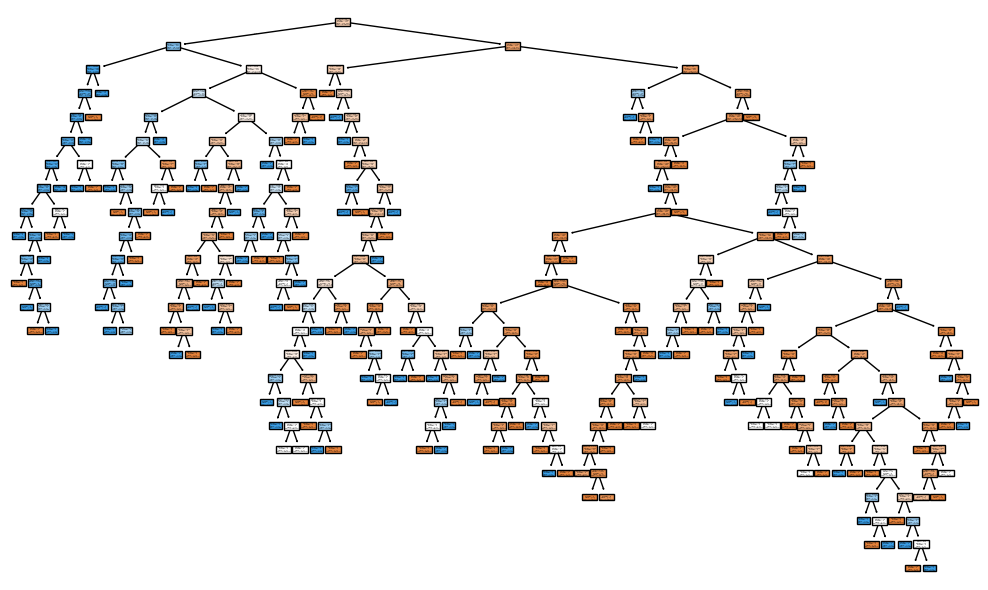

In [28]:
#-- Visualisasi Pohon Keputusan --
plt.figure(figsize=(10,6))
plt.title('Decision Tree Titanic')
plot_tree(id3,filled=True,feature_names=X.columns,class_names=['No Survived','Survived'])
plt.tight_layout()
plt.show()

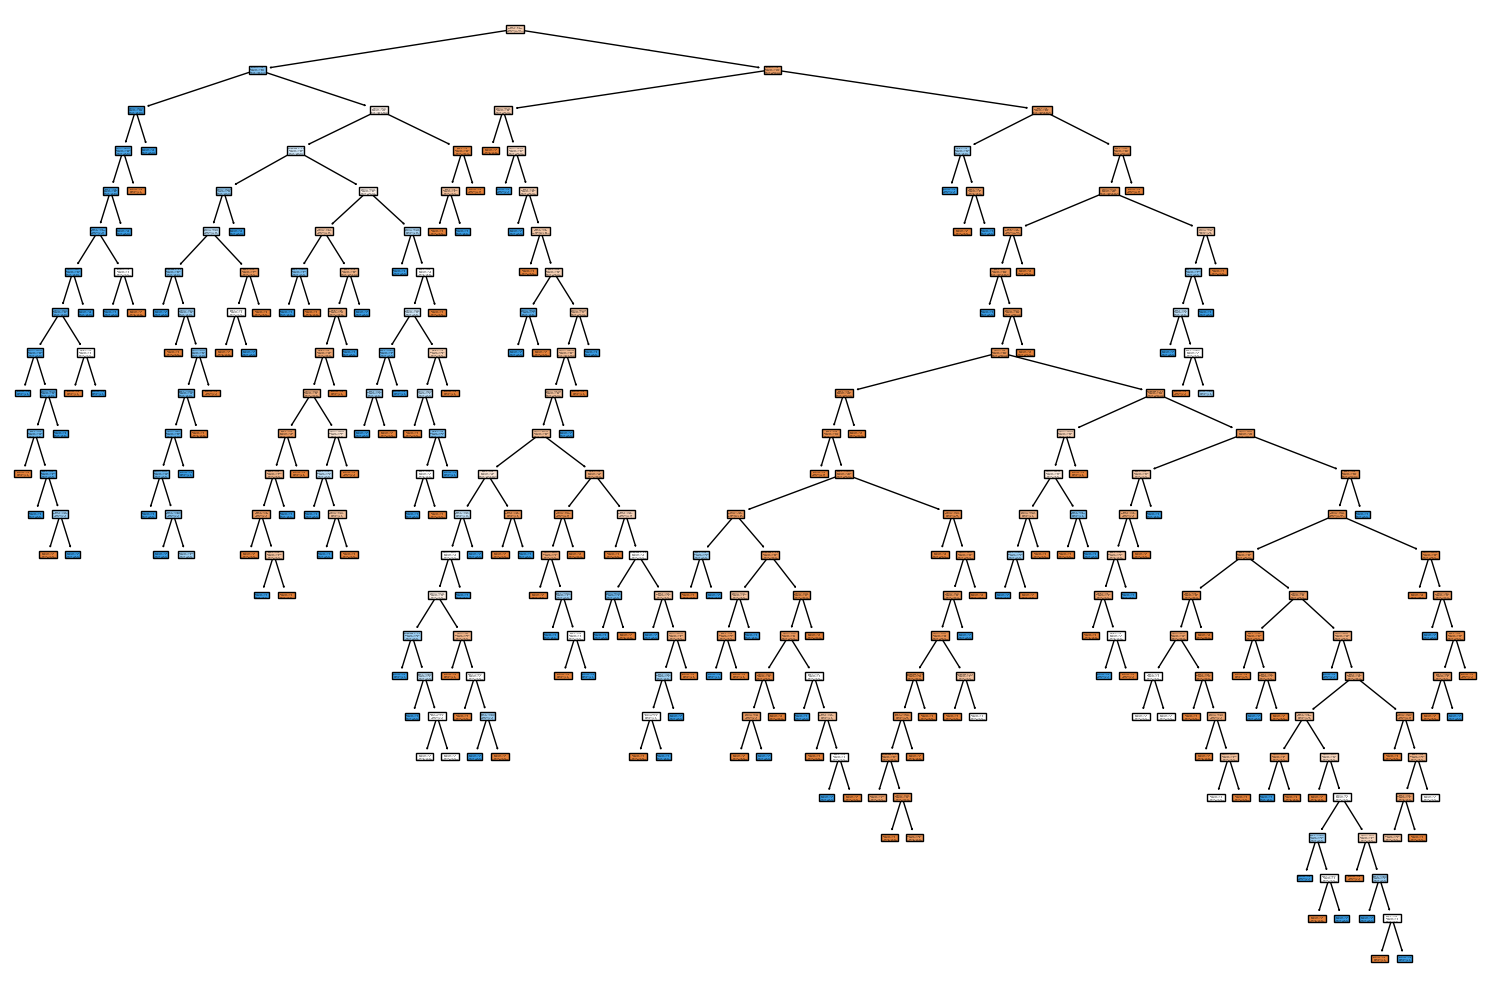

In [29]:
# -- Visualisasi Pohon Keputusan dan Simpan ke File --
plt.figure(figsize=(15, 10))
plt.title('Titanic Decision Tree Classifier')
plot_tree(id3,
          filled=True,
          feature_names=X.columns,
          class_names=['No Survive', 'Survive'])

plt.tight_layout()
plt.savefig("decision_tree_titanic.png", dpi=300)  # Simpan sebagai file PNG
plt.show()

In [21]:
X_test.shape

(178, 7)

In [12]:
df_pilih.head()

,survived,pclass,sex,age,sibsp,sibsp,fare,embarked
0,0,3,1.0,22.0,1,1,7.2500,2.0
1,1,1,0.0,38.0,1,1,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,1,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
